**Project Title: Credit Risk Assessment for Loan Approval**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import plotly.express as ex
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette


In [13]:
df = pd.read_csv("credit_risk.csv")

In [14]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [15]:
df.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [16]:
df.head().T

,0,1,2,3,4
Id,0,1,2,3,4
Age,22,21,25,23,24
Income,59000,9600,9600,65500,54400
Home,RENT,OWN,MORTGAGE,RENT,RENT
Emp_length,123.0,5.0,1.0,4.0,8.0
Intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
Amount,35000,1000,5500,35000,35000
Rate,16.02,11.14,12.87,15.23,14.27
Status,1,0,1,1,1
Percent_income,0.59,0.1,0.57,0.53,0.55


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [18]:
df.shape

(32581, 12)

In [19]:
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer
most_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [21]:
df['Emp_length'].fillna(df['Emp_length'].median(),inplace  = True)
df['Rate'].fillna(df['Rate'].mean(),inplace  = True)

In [22]:
df.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [23]:
df.drop(["Id"],axis = 1,inplace = True)

In [24]:
print("No: of Duplicates",str(df.duplicated().sum()))

No: of Duplicates 165


In [25]:
df.drop_duplicates(keep= False,inplace = True)

In [26]:
rows = df.shape[0]
columns = df.shape[1]

In [27]:
print("rows = ",rows)
print("columns = ",columns)

rows =  32251
columns =  11


In [28]:
df['Status'].value_counts()

0    25181
1     7070
Name: Status, dtype: int64

**Performing EDA**

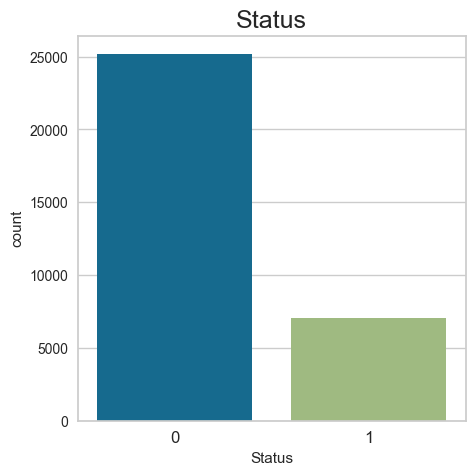

In [29]:
fig,ax = plt.subplots(figsize = (5,5))
sns.countplot(x = df['Status'])
plt.title("Status", fontsize = 18)
plt.xticks(fontsize = 12)
plt.show()

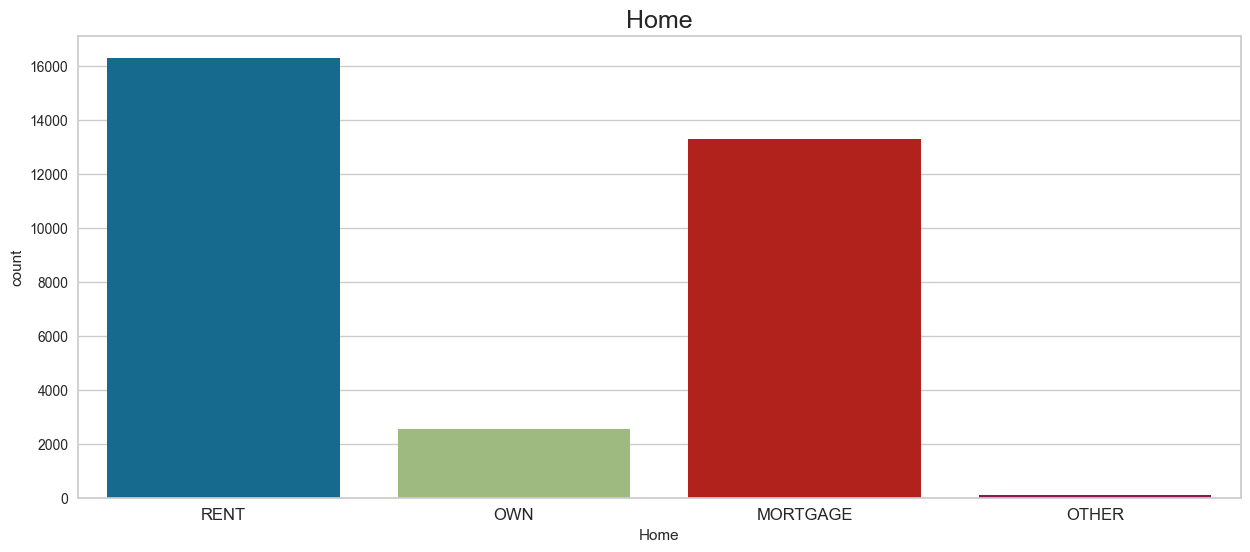

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x=df["Home"])
plt.title('Home', fontsize = 18)
plt.xticks(fontsize = 12) 
plt.show()

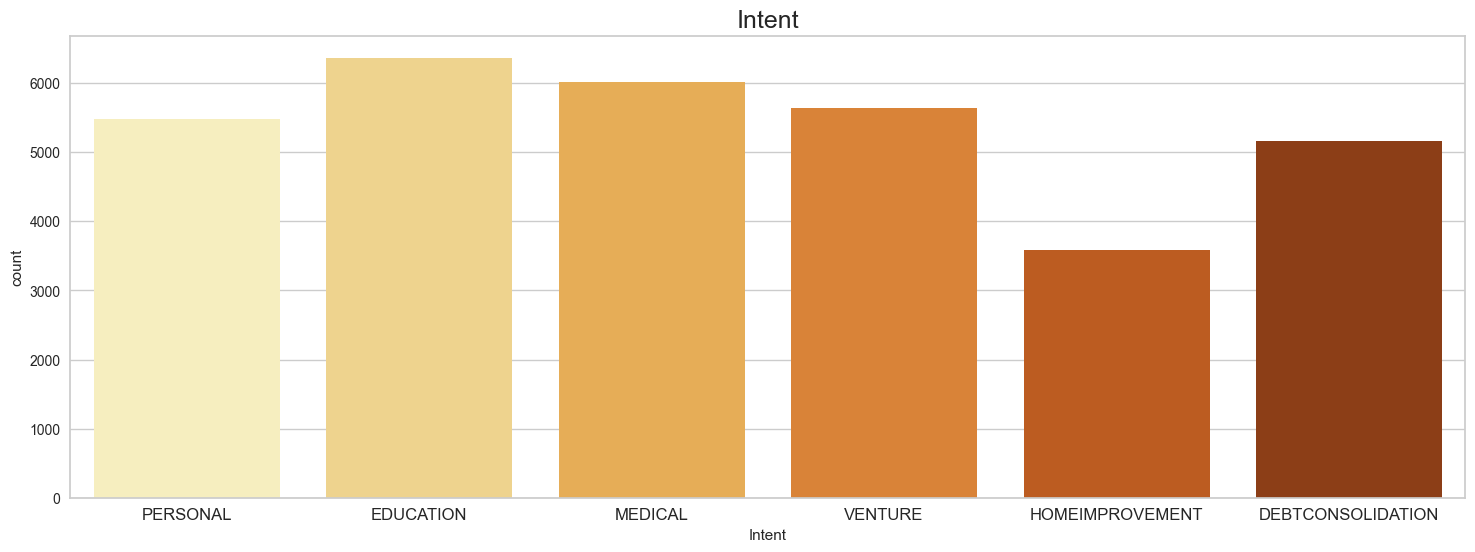

In [31]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x=df["Intent"], palette="YlOrBr")
plt.title('Intent', fontsize = 18)
plt.xticks(fontsize = 12) 
plt.show()

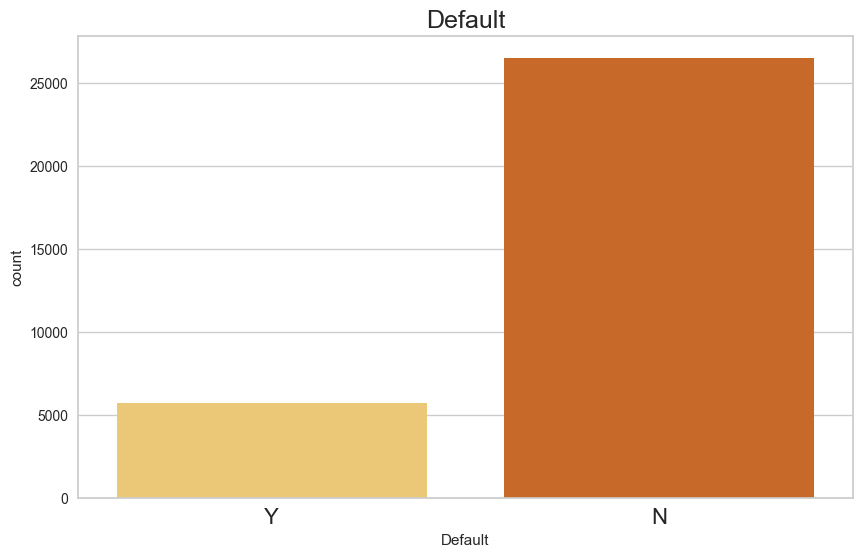

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=df["Default"], palette="YlOrBr")
plt.title('Default', fontsize = 18)
plt.xticks(fontsize = 16) 
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
objlist = df.select_dtypes(include='object').columns

for obj in objlist:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [34]:
df.sample(5)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1563,26,27983,0,7.0,0,6000,7.88,0,0.21,0,3
12111,25,45996,3,3.0,5,11500,12.53,0,0.25,0,4
28160,35,48000,0,8.0,3,2000,11.97,0,0.04,0,10
11081,23,42000,3,0.0,2,10000,15.58,1,0.24,1,3
2132,21,30000,0,0.0,4,4750,9.63,1,0.16,0,2


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Home'}>],
       [<Axes: title={'center': 'Emp_length'}>,
        <Axes: title={'center': 'Intent'}>,
        <Axes: title={'center': 'Amount'}>],
       [<Axes: title={'center': 'Rate'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Percent_income'}>],
       [<Axes: title={'center': 'Default'}>,
        <Axes: title={'center': 'Cred_length'}>, <Axes: >]], dtype=object)

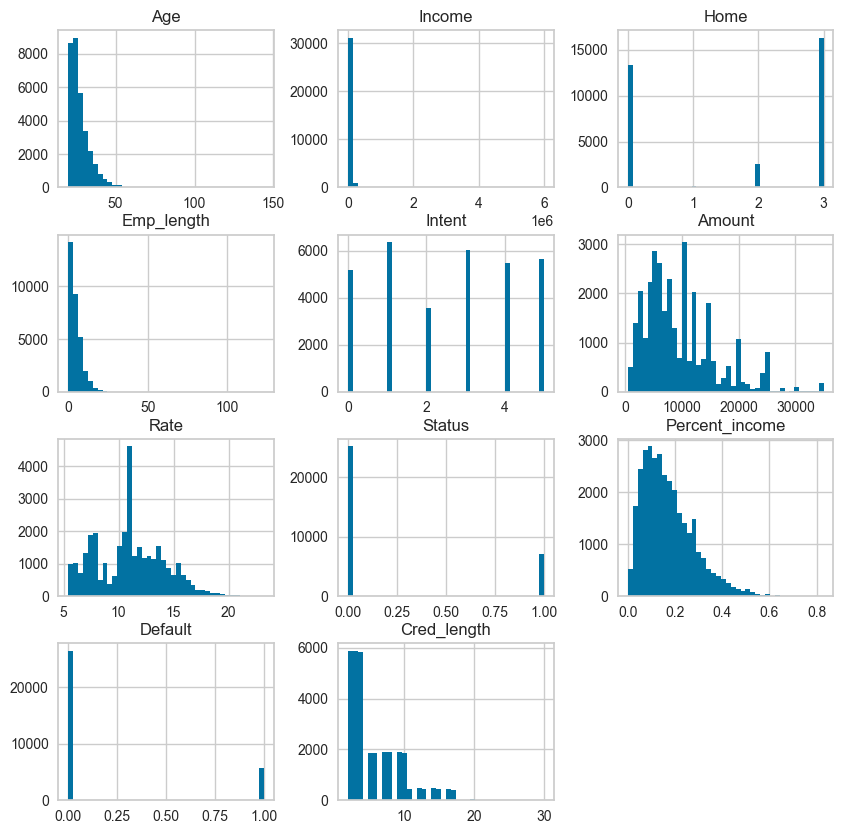

In [35]:
df.hist(bins = 40,figsize = (10,10))

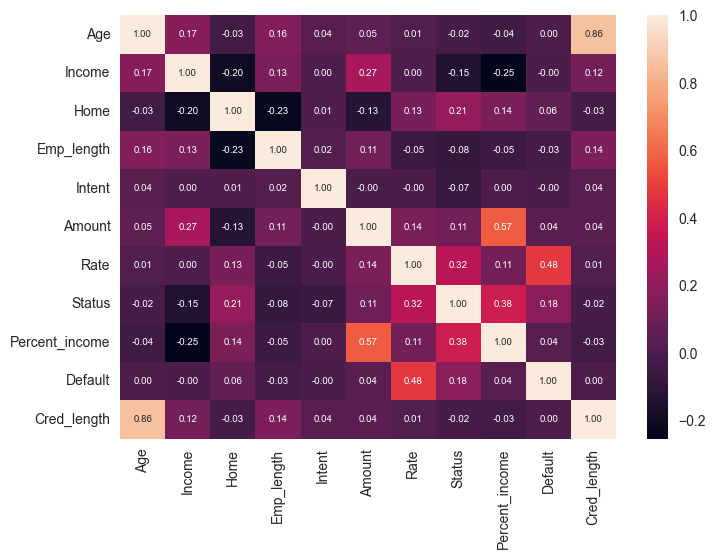

In [36]:
corr = df.corr()

sns.heatmap(corr, annot=True, fmt='0.2f',annot_kws={'size':7})
plt.show()

In [37]:
X,y=df.drop("Status",axis=1),df[['Status']]

In [38]:
from sklearn.model_selection import train_test_split

# split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25800, 10), (6451, 10), (25800, 1), (6451, 1))

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

g = GaussianNB()
B = BernoulliNB()
LR = LogisticRegression()
KNC = KNeighborsClassifier()
D = DecisionTreeClassifier()
r=RandomForestClassifier()

In [40]:
g.fit(X_train,y_train)
B.fit(X_train,y_train)
LR.fit(X_train,y_train)
KNC.fit(X_train,y_train)
D.fit(X_train,y_train)
r.fit(X_train,y_train)


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConve

RandomForestClassifier()

In [41]:
predG=g.predict(X_train)
predB=B.predict(X_train)
predK=KNC.predict(X_train)
predL=LR.predict(X_train)
predD=D.predict(X_train)
predR=r.predict(X_train)

In [42]:
print("GaussianNB:       ", accuracy_score(predG,y_train))
print("BernoulliNB:      ", accuracy_score(predB,y_train))
print("KNeighbours:      ", accuracy_score(predK,y_train))
print("LogisticReg:      ", accuracy_score(predL,y_train))
print("DecisionTree:     ", accuracy_score(predD,y_train))
print("RandomForest:     ", accuracy_score(predR,y_train))

GaussianNB:        0.815
BernoulliNB:       0.7839147286821705
KNeighbours:       0.877170542635659
LogisticReg:       0.8037209302325582
DecisionTree:      1.0
RandomForest:      1.0


In [43]:
y = df["Status"]
X = df.drop("Status", axis="columns")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22575, 10), (9676, 10), (22575,), (9676,))

In [45]:
# RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(criterion="gini", min_samples_split=2, random_state=123)
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [46]:
y_pred = rfc.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9186


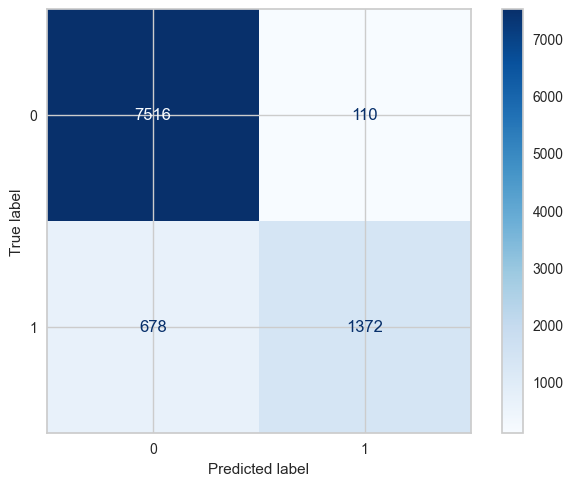

In [48]:
# ConfusionMatrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['0', '1'])